In [1]:
# -*- coding: utf-8 -*-
# @description: Implementing a perceptron learing algorithm in python
# @author: tongzi
# @created date: 2019/08/23
# @last modification: 2019/08/23

In [3]:
#Import Libraries
import numpy as np
import pandas as pd

In [15]:
class Perceptron:
    '''
    Perceptron classifier.
    
    Paramenters
    --------------
    eta : float
        Learing rate
    n_iter : int
        passes over the training dataset
        
    Attributes
    ------------
    w_ : 1D-array
       Weights after fitting
    errors_ : list
       Numbers of misclassifications in every epoch.
    '''
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        '''
        Fit training data
        
        Parameters
        ------------
        X : {array-like}, shape=(n_samples, n_features)
            Training matrix, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape=(n_samples)
            Target values
            
        Returns
        --------
        self : object
        '''
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
                
    def net_input(self, X):
        '''calculate the net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        '''
        return class label after unit step.
        '''
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

In [20]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                   header=None)

In [30]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
y = data.iloc[:100, 4]

In [35]:
y = np.where(y=='Iris-setosa', -1, 1)

In [40]:
X = data.iloc[:100, [0, 2]].values

In [46]:
X.shape

(100, 2)

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'sepal length/$cm$')

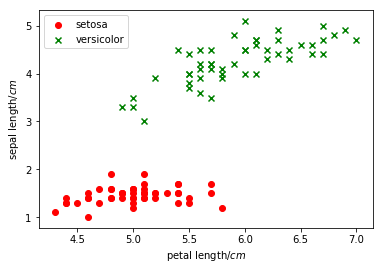

In [53]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='green', marker='x', label='versicolor')
plt.legend(loc='best')
plt.xlabel('petal length/$cm$')
plt.ylabel('sepal length/$cm$')

In [54]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [55]:
ppn.fit(X, y)

In [56]:
ppn.errors_

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

Text(0,0.5,'Number of misclassifications')

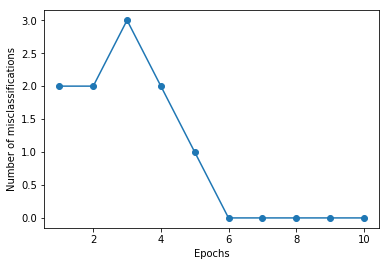

In [60]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')